In [10]:
import pandas as pd
df = pd.read_csv('./text_data.csv', sep=",")
df

,Review,Date,Rate
0,They were fantastic people the price was great...,29 avril 2024,5
1,The most awesome & efficient service EVER!! Le...,17 avril 2024,5
2,Dealing with Christian was great. He got me th...,27 avril 2024,5
3,Everything was good except I wasn't told initi...,17 avril 2024,5
4,Very streamlined and efficient process. Christ...,25 avril 2024,5
...,...,...,...
5073,Five Stars - recommended to all who are intere...,10 août 2017,5
5074,The whole process went smooth and effortlessly...,09 août 2017,5
5075,Would have liked more but will take what I can...,09 août 2017,5
5076,The entire Process was pretty seamless. I had...,08 août 2017,5


Data Cleaning

First convert non-English comments into English

In [11]:
from langdetect import detect
from googletrans import Translator

In [12]:
translator = Translator()

def detect_and_translate(text):
    try:
        lang = detect(text)
        if lang != 'en':
            translated = translator.translate(text, dest='en').text
            return translated
        else:
            return text
    except Exception as e:
        return text

df['Review'] = df['Review'].apply(detect_and_translate)


In [13]:
df

,Review,Date,Rate
0,They were fantastic people the price was great...,29 avril 2024,5
1,The most awesome & efficient service EVER!! Le...,17 avril 2024,5
2,Dealing with Christian was great. He got me th...,27 avril 2024,5
3,Everything was good except I wasn't told initi...,17 avril 2024,5
4,Very streamlined and efficient process. Christ...,25 avril 2024,5
...,...,...,...
5073,Five Stars - recommended to all who are intere...,10 août 2017,5
5074,The whole process went smooth and effortlessly...,09 août 2017,5
5075,Would have liked more but will take what I can...,09 août 2017,5
5076,The entire Process was pretty seamless. I had...,08 août 2017,5


In [14]:
df.to_csv('translated_text_data.csv', sep=',', decimal='.', index=None)

In [16]:
file_path = 'translated_text_data.csv'
df = pd.read_csv(file_path)

print(df.head())

                                              Review           Date  Rate
0  They were fantastic people the price was great...  29 avril 2024     5
1  The most awesome & efficient service EVER!! Le...  17 avril 2024     5
2  Dealing with Christian was great. He got me th...  27 avril 2024     5
3  Everything was good except I wasn't told initi...  17 avril 2024     5
4  Very streamlined and efficient process. Christ...  25 avril 2024     5


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078 entries, 0 to 5077
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  5078 non-null   object
 1   Date    5078 non-null   object
 2   Rate    5078 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 119.1+ KB
None


In [18]:
print(df.describe())

              Rate
count  5078.000000
mean      4.793423
std       0.673699
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000


In [19]:
print(df.isnull().sum())

Review    0
Date      0
Rate      0
dtype: int64


Then, we do more preprocessing, remove special characters, URLs, stop words, emoticons, and apply tokenization or lemmatization.

In [21]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...


True

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('translated_text_data.csv')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.encode('ascii', 'ignore').decode('ascii')
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_text'] = df['Review'].apply(preprocess_text)

df

,Review,Date,Rate,cleaned_text
0,They were fantastic people the price was great...,29 avril 2024,5,fantastic people price great people spoke exce...
1,The most awesome & efficient service EVER!! Le...,17 avril 2024,5,awesome efficient service ever leilani rep coo...
2,Dealing with Christian was great. He got me th...,27 avril 2024,5,dealing christian great got best offer wrecked...
3,Everything was good except I wasn't told initi...,17 avril 2024,5,everything good except told initially needed g...
4,Very streamlined and efficient process. Christ...,25 avril 2024,5,streamlined efficient process christian carbra...
...,...,...,...,...
5073,Five Stars - recommended to all who are intere...,10 août 2017,5,five star recommended interested
5074,The whole process went smooth and effortlessly...,09 août 2017,5,whole process went smooth effortlessly feel go...
5075,Would have liked more but will take what I can...,09 août 2017,5,would liked take get
5076,The entire Process was pretty seamless. I had...,08 août 2017,5,entire process pretty seamless car breakdown n...


In [26]:
df.to_csv('cleaned_text_data.csv', index=False)

Exploratory Data Analysis

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

df = pd.read_csv('cleaned_text_data.csv')

df['cleaned_text'] = df['cleaned_text'].astype(str)

print(df['cleaned_text'].head())

0    fantastic people price great people spoke exce...
1    awesome efficient service ever leilani rep coo...
2    dealing christian great got best offer wrecked...
3    everything good except told initially needed g...
4    streamlined efficient process christian carbra...
Name: cleaned_text, dtype: object


In [30]:
words = []
df['cleaned_text'].apply(lambda x: words.extend(word_tokenize(x)))

word_counts = Counter(words)

print(word_counts.most_common(10))

[('car', 2924), ('easy', 2087), ('carbrain', 1661), ('process', 1416), ('would', 1245), ('great', 1097), ('service', 1044), ('recommend', 892), ('experience', 843), ('vehicle', 842)]


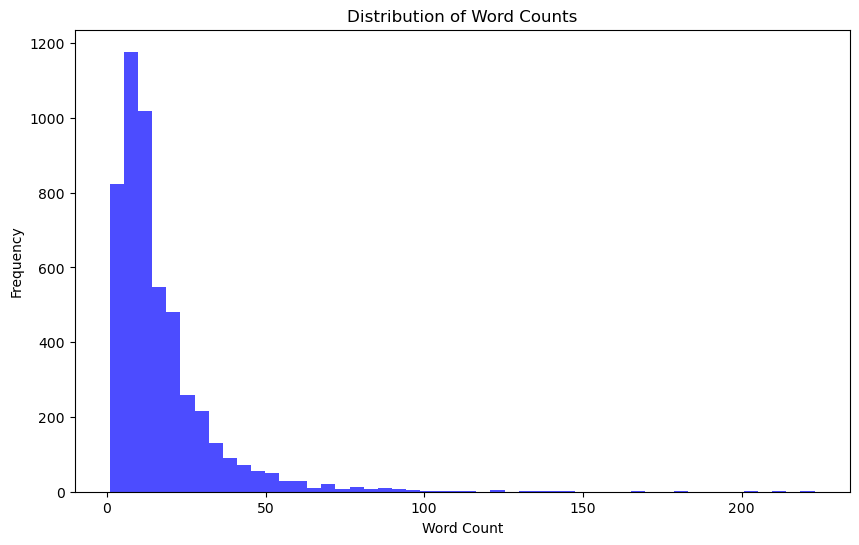

In [31]:
df['word_count'] = df['cleaned_text'].apply(lambda x: len(word_tokenize(x)))

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

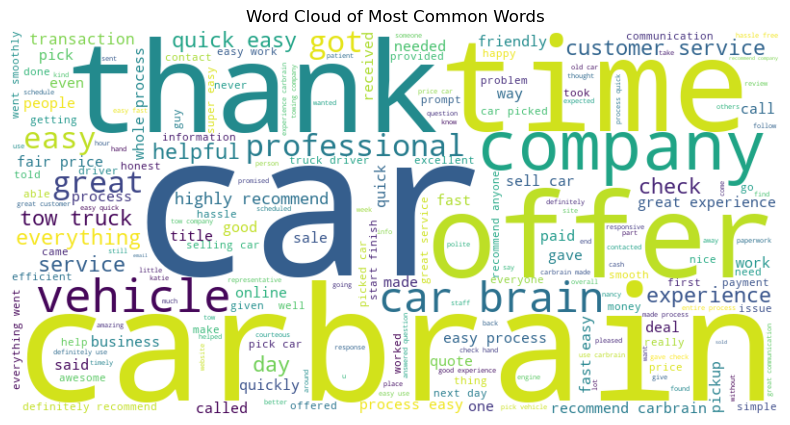

In [32]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Most Common Words')
plt.show()

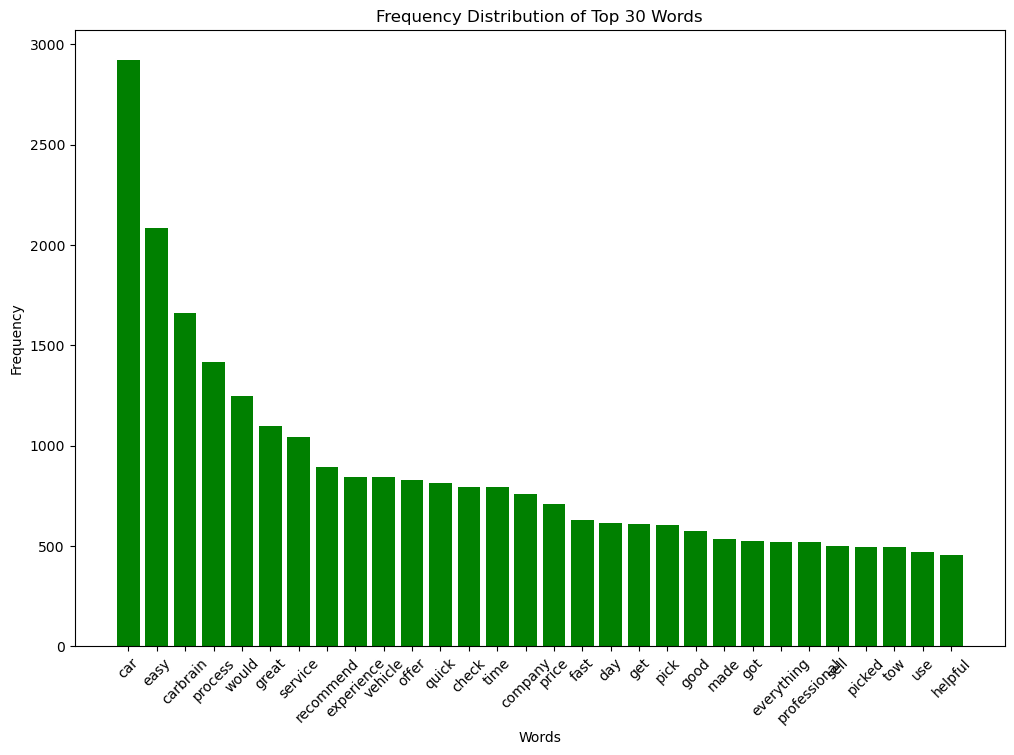

In [33]:
top_words = word_counts.most_common(30)  
words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
plt.bar(words_df['Word'], words_df['Frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Top 30 Words')
plt.show()

In [34]:
from nltk import bigrams

bigram_freq = Counter(bigrams(words))

print(bigram_freq.most_common(10))

[(('car', 'brain'), 369), (('customer', 'service'), 302), (('tow', 'truck'), 282), (('quick', 'easy'), 274), (('highly', 'recommend'), 268), (('would', 'recommend'), 259), (('sell', 'car'), 218), (('easy', 'process'), 200), (('great', 'experience'), 196), (('would', 'definitely'), 194)]


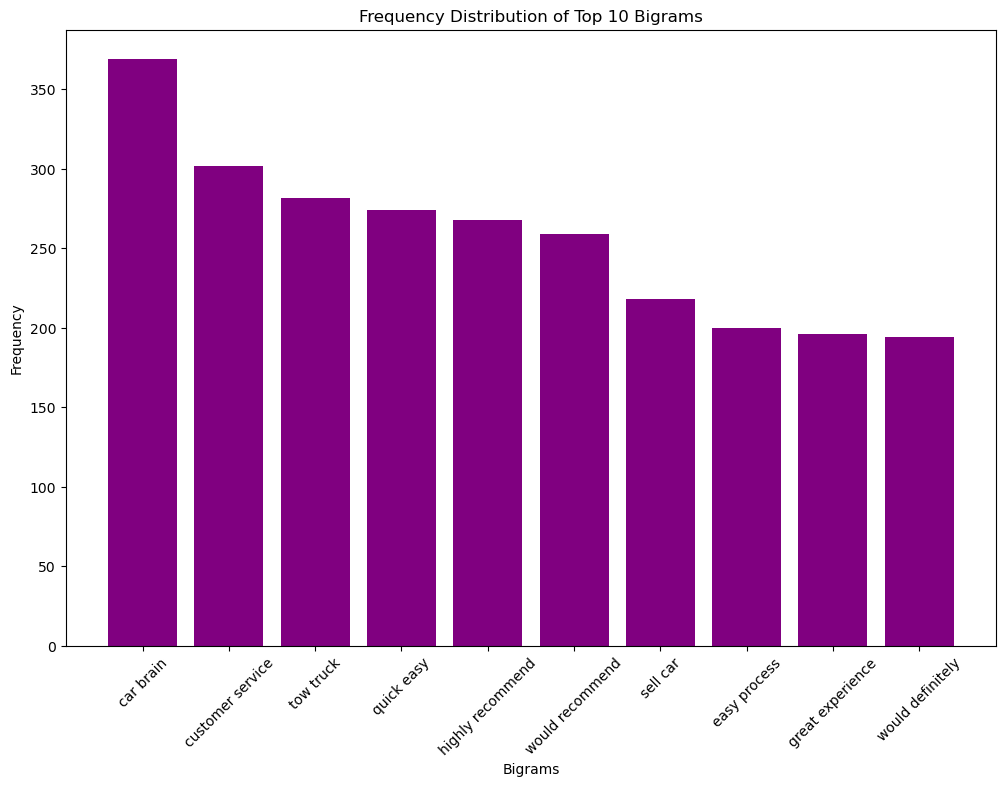

In [35]:
top_bigrams = bigram_freq.most_common(10)
bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 8))
plt.bar(bigrams_df['Bigram'], bigrams_df['Frequency'], color='purple')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Top 10 Bigrams')
plt.show()

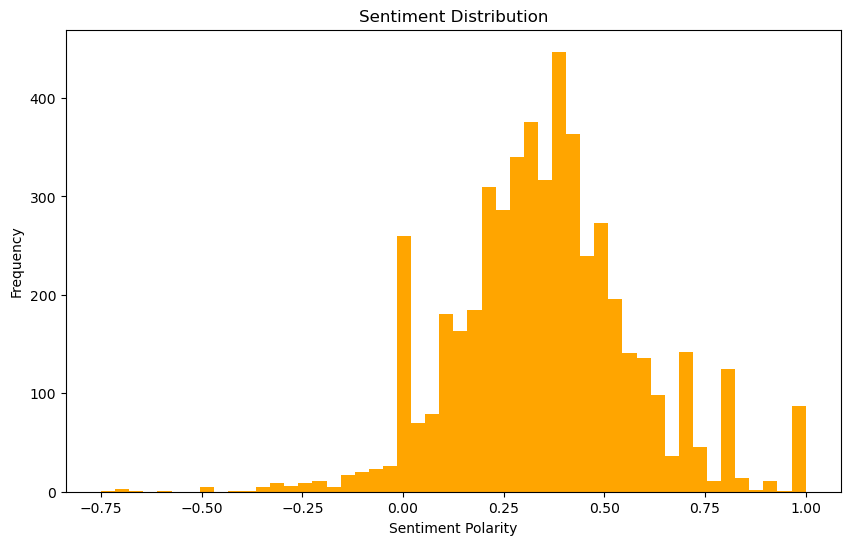

In [36]:
from textblob import TextBlob

def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['cleaned_text'].apply(sentiment_analysis)

plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment'], bins=50, color='orange')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [38]:
pip install textstat

  Obtaining dependency information for textstat from https://files.pythonhosted.org/packages/d8/33/302083f47386d651e4b42923f5206eeb9ee0545ea94bb506324d05fd2274/textstat-0.7.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


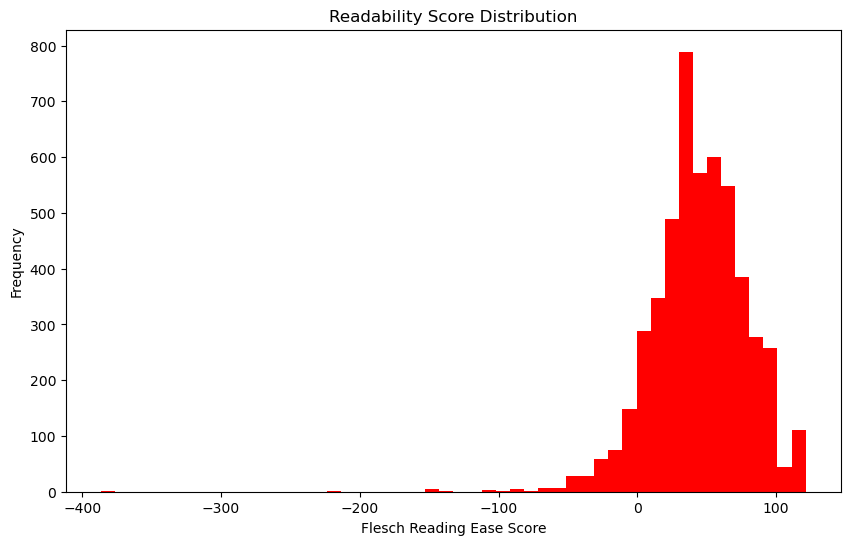

In [39]:
import textstat

def readability(text):
    return textstat.flesch_reading_ease(text)

df['Readability'] = df['cleaned_text'].apply(readability)

plt.figure(figsize=(10, 6))
plt.hist(df['Readability'], bins=50, color='red')
plt.title('Readability Score Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.show()

Other tokenization methods: sentence-level tokenization, regular expression custom tokenization, using spaCy for advanced tokenization

In [40]:
import nltk
from nltk.tokenize import sent_tokenize

df['sentences'] = df['cleaned_text'].apply(sent_tokenize)
print(df[['cleaned_text', 'sentences']].head())

                                        cleaned_text  \
0  fantastic people price great people spoke exce...   
1  awesome efficient service ever leilani rep coo...   
2  dealing christian great got best offer wrecked...   
3  everything good except told initially needed g...   
4  streamlined efficient process christian carbra...   

                                           sentences  
0  [fantastic people price great people spoke exc...  
1  [awesome efficient service ever leilani rep co...  
2  [dealing christian great got best offer wrecke...  
3  [everything good except told initially needed ...  
4  [streamlined efficient process christian carbr...  


In [41]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

df['custom_tokens'] = df['cleaned_text'].apply(lambda text: tokenizer.tokenize(text))
print(df[['cleaned_text', 'custom_tokens']].head())

                                        cleaned_text  \
0  fantastic people price great people spoke exce...   
1  awesome efficient service ever leilani rep coo...   
2  dealing christian great got best offer wrecked...   
3  everything good except told initially needed g...   
4  streamlined efficient process christian carbra...   

                                       custom_tokens  
0  [fantastic, people, price, great, people, spok...  
1  [awesome, efficient, service, ever, leilani, r...  
2  [dealing, christian, great, got, best, offer, ...  
3  [everything, good, except, told, initially, ne...  
4  [streamlined, efficient, process, christian, c...  


In [42]:
import spacy
nlp = spacy.load('en_core_web_sm')

def spacy_tokenize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return tokens

df['spacy_tokens'] = df['cleaned_text'].apply(spacy_tokenize)
print(df[['cleaned_text', 'spacy_tokens']].head())

                                        cleaned_text  \
0  fantastic people price great people spoke exce...   
1  awesome efficient service ever leilani rep coo...   
2  dealing christian great got best offer wrecked...   
3  everything good except told initially needed g...   
4  streamlined efficient process christian carbra...   

                                        spacy_tokens  
0  [fantastic, people, price, great, people, spea...  
1  [awesome, efficient, service, leilani, rep, co...  
2  [deal, christian, great, get, good, offer, wre...  
3  [good, tell, initially, need, title, notarize,...  
4  [streamline, efficient, process, christian, ca...  


Feature Extraction

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, min_df=3, max_df=0.85, ngram_range=(1,2))
tfidf_features = vectorizer.fit_transform(df['cleaned_text'])

print(vectorizer.get_feature_names_out()[:10]) 

['00' '000' '000 mile' '10' '10 10' '10 day' '10 minute' '10 star' '100'
 '100 dollar']


Topic Modeling

In [65]:
from sklearn.decomposition import NMF

num_topics = 5

nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_features)
H = nmf_model.components_

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    top_features = [feature_names[i] for i in topic.argsort()[-10:]] 
    print(f"Topic {topic_idx+1}: {' '.join(top_features)}")

Topic 1: brain get picked day price time offer carbrain check car
Topic 2: response quick response process easy easy quick process quick easy process process quick easy easy quick
Topic 3: communication excellent great customer great experience experience great service customer service customer service great
Topic 4: work experience fast friendly convenient process fast fair easy fast easy fast easy fast
Topic 5: would definitely anyone use would recommend highly recommend definitely carbrain highly would recommend


Text Classification or Sentiment Analysis

In [66]:
def sentiment_category(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['Sentiment'].apply(sentiment_category)


In [68]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.2 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['sentiment_category'], test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train_encoded)
y_pred_svc = svc.predict(X_test)
print("SVC Classification Report:")
print(classification_report(y_test_encoded, y_pred_svc, target_names=label_encoder.classes_))


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))

SVC Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        18
     neutral       0.70      0.15      0.25       104
    positive       0.90      1.00      0.94       894

    accuracy                           0.89      1016
   macro avg       0.53      0.38      0.40      1016
weighted avg       0.86      0.89      0.86      1016



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.06      0.11        18
     neutral       0.63      0.55      0.59       104
    positive       0.94      0.97      0.96       894

    accuracy                           0.91      1016
   macro avg       0.86      0.53      0.55      1016
weighted avg       0.91      0.91      0.90      1016



In [71]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
y_pred_grid = grid_search.predict(X_test)
print("Grid Search SVC Classification Report:")
print(classification_report(y_test, y_pred_grid))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1